In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [34]:
plt.style.use('ggplot')
sns.set_palette("viridis")

In [35]:
df = pd.read_csv("India.csv", encoding='latin1')

In [36]:
print("\nDataframe info:")
print(df.info())


Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   $ millions, unless otherwise indicated  65 non-null     object
 1   2013                                    59 non-null     object
 2   2014                                    59 non-null     object
 3   2015                                    59 non-null     object
 4   2016                                    59 non-null     object
 5   2017                                    59 non-null     object
 6   2018                                    59 non-null     object
 7   2019                                    59 non-null     object
 8   2020                                    59 non-null     object
 9   2021                                    59 non-null     object
 10  2022                                    59 non-null     obj

In [37]:
print("\nFirst few rows:")
print(df.head())


First few rows:
      $ millions, unless otherwise indicated        2013        2014  \
0  Summary external debt data by debtor type         NaN         NaN   
1                 Total External debt stocks  427,245.10  457,507.40   
2      Use of IMF Credit and SDR allocations    6,126.50    5,763.70   
3                    Long-term external debt  328,412.50  366,169.30   
4      Public and publicly guaranteed sector  121,461.80  152,515.20   

         2015        2016        2017        2018        2019        2020  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1  478,831.00  455,541.90  511,575.70  521,175.70  561,017.40  564,979.30   
2    5,512.80    5,348.10    5,665.60    5,532.90    5,501.20    5,729.80   
3  391,755.40  366,260.90  408,301.50  411,718.80  448,736.60  455,716.50   
4  162,310.90  153,013.30  183,017.50  180,540.00  192,007.50  192,805.10   

         2021        2022        2023  
0         NaN         NaN         NaN  
1  611,

In [38]:
df_clean = df.copy()

In [39]:
df_clean = df_clean[~df_clean['$ millions, unless otherwise indicated'].isin([
    'Summary external debt data by debtor type',
    'Summary external debt stock by creditor type',
    'Net financial inflows',
    'Net debt inflows',
    'Net equity inflows',
    'Debt ratios'
])]

In [40]:
year_columns = [str(year) for year in range(2013, 2024)]
for col in year_columns:
    df_clean[col] = df_clean[col].replace('..', np.nan)
    df_clean[col] = pd.to_numeric(df_clean[col].str.replace(',', ''), errors='coerce')

In [ ]:
os.makedirs("results/figures", exist_ok=True)

In [42]:
id_vars = ['$ millions, unless otherwise indicated']
long_df = pd.melt(
    df_clean, 
    id_vars=id_vars, 
    value_vars=year_columns,
    var_name='Year', 
    value_name='Value'
)

In [43]:
long_df['Year'] = pd.to_numeric(long_df['Year'])

In [44]:
print("Long format sample:")
print(long_df.head())

Long format sample:
  $ millions, unless otherwise indicated  Year     Value
0             Total External debt stocks  2013  427245.1
1  Use of IMF Credit and SDR allocations  2013    6126.5
2                Long-term external debt  2013  328412.5
3  Public and publicly guaranteed sector  2013  121461.8
4                          Public sector  2013  121460.9


1. Trend Analysis of Total External Debt

In [45]:
key_indicators = [
    'Total External debt stocks',
    'Long-term external debt',
    'Short-term external debt',
    'Use of IMF Credit and SDR allocations'
]

In [46]:
key_df = long_df[long_df['$ millions, unless otherwise indicated'].isin(key_indicators)]

In [47]:
trend_pivot = key_df.pivot_table(
    index='Year',
    columns='$ millions, unless otherwise indicated',
    values='Value'
)

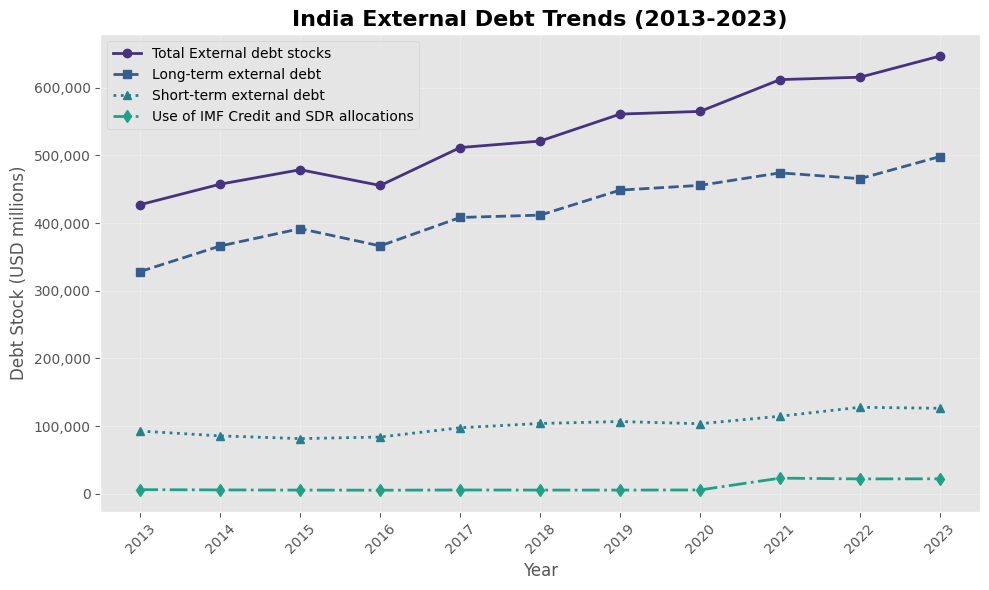

In [48]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.figure(figsize=(10, 6))

line_styles = ['-', '--', ':', '-.']
markers     = ['o', 's', '^', 'd']

for i, indicator in enumerate(key_indicators):
    if indicator in trend_pivot.columns:
        plt.plot(
            trend_pivot.index,
            trend_pivot[indicator],
            linestyle=line_styles[i],
            marker=markers[i],
            linewidth=2,
            label=indicator
        )

plt.title("India External Debt Trends (2013‑2023)", fontsize=16, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Debt Stock (USD millions)")
plt.xticks(trend_pivot.index, rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))
plt.grid(alpha=0.3)
plt.legend(loc="upper left")
plt.tight_layout()

plt.show()


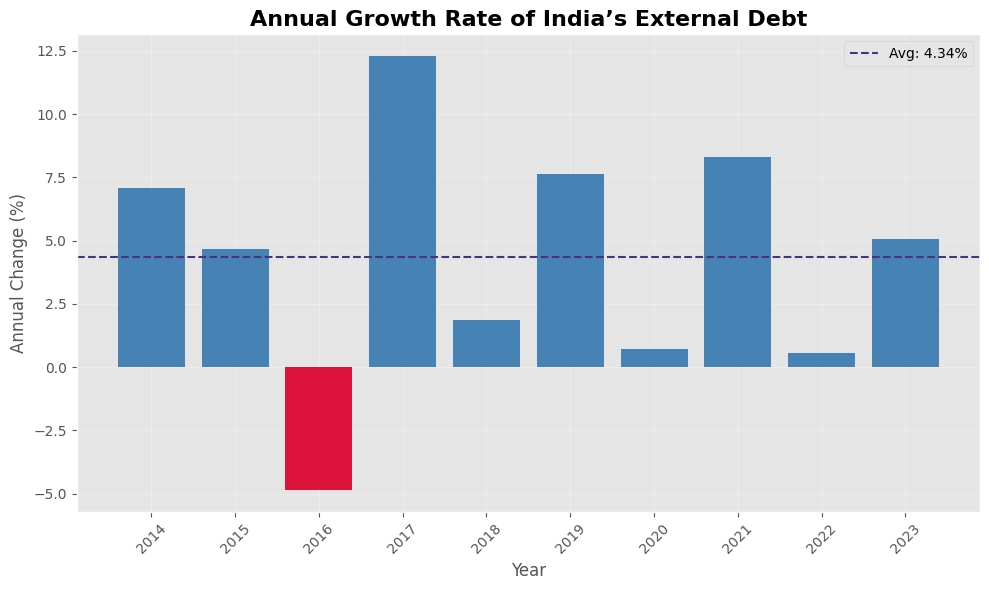

In [49]:
import matplotlib.pyplot as plt

growth = trend_pivot['Total External debt stocks'].pct_change() * 100
years  = growth.index[1:]
values = growth.values[1:]

colors = ['crimson' if v < 0 else 'steelblue' for v in values]

plt.figure(figsize=(10, 6))
plt.bar(years, values, color=colors)

avg = values.mean()
plt.axhline(avg, linestyle='--', linewidth=1.5, label=f'Avg: {avg:.2f}%')

plt.title("Annual Growth Rate of India’s External Debt", fontsize=16, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Annual Change (%)")
plt.xticks(years, rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()